## Reading and Undertsanding the Data

In [504]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [505]:
#Importing all the necessary libraries
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## Reading and understanding data

In [507]:
#Reading 'day' dataset
bike = pd.read_csv('day.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [508]:
#Determining the shape of the datset
bike.shape

(730, 16)

In [509]:
#Statistical information about dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [510]:
#Information about the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [511]:
#Find the percentage of missing values for all the columns
bike.isnull().mean() * 100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [512]:
#Dropping duplicate values if any
bike.drop_duplicates(inplace=True)

In [513]:
bike.shape

(730, 16)

#### Since the shape of dataframe is same after dropping duplicates this implies there were no duplicates in the original dataframe

In [515]:
# Dropping the unwanted columns
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [517]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [518]:
bike.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [519]:
#Encoding the season column
bike.season=bike.season.replace({1:'spring',2:'summer',3:'fall',4:'winter'})

In [520]:
#Encoding the weathersit column
bike.weathersit=bike.weathersit.replace({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [521]:
#Encoding the weekday column
bike.weekday=bike.weekday.replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [522]:
#Encoding the month column
bike.mnth=bike.mnth.replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [523]:
#Check the head of the dataset
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Visualising the data

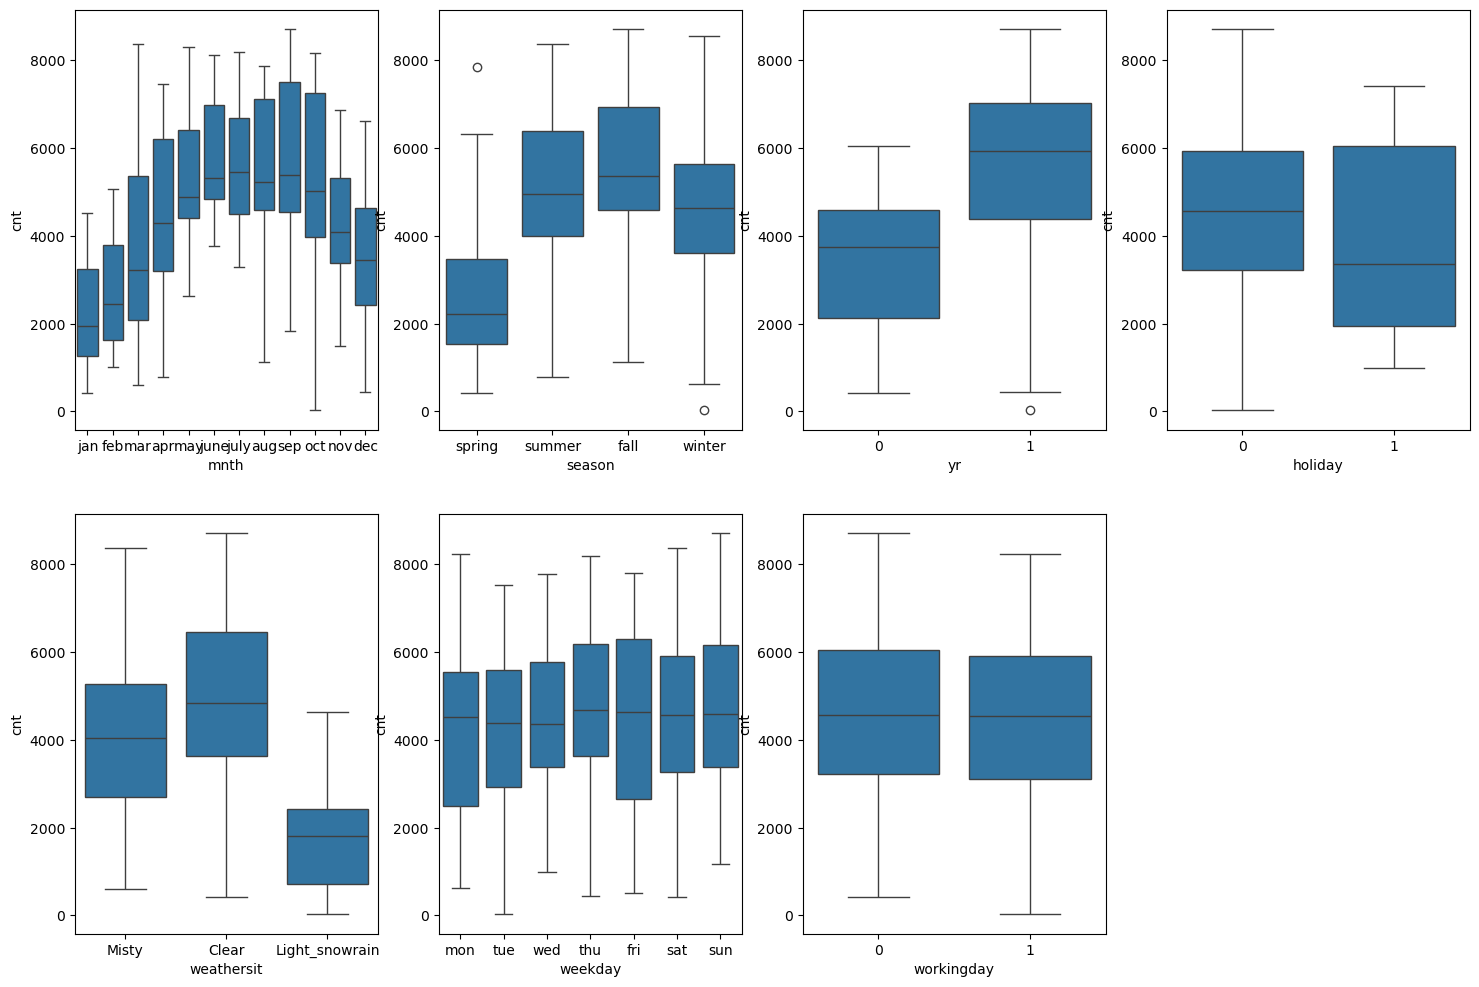

In [535]:
#Analysing the categorical columns
plt.figure(figsize=(18,12))
plt.subplot(2,4,1)
sns.boxplot(x='mnth',y='cnt',data=bike)
plt.subplot(2,4,2)
sns.boxplot(x='season',y='cnt',data=bike)
plt.subplot(2,4,3)
sns.boxplot(x='yr',y='cnt',data=bike)
plt.subplot(2,4,4)
sns.boxplot(x='holiday',y='cnt',data=bike)
plt.subplot(2,4,5)
sns.boxplot(x='weathersit',y='cnt',data=bike)
plt.subplot(2,4,6)
sns.boxplot(x='weekday',y='cnt',data=bike)
plt.subplot(2,4,7)
sns.boxplot(x='workingday',y='cnt',data=bike)
plt.show()

### Univariate Analysis

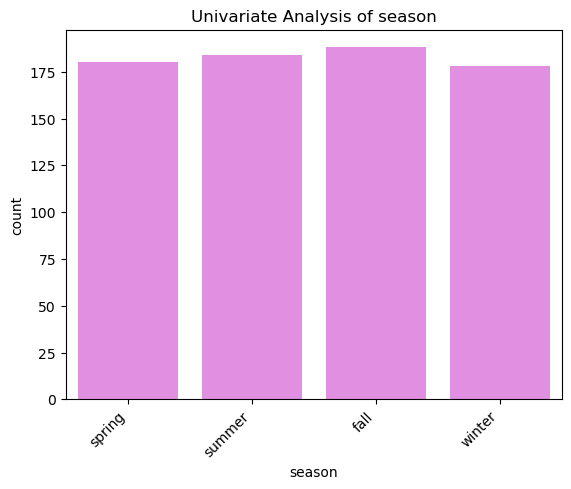

In [544]:
sns.countplot(x=bike['season'],color='Violet')
plt.xticks(rotation=45, ha='right')
plt.title('Univariate Analysis of season')
plt.show()

#### Bike rentals are more in fall season

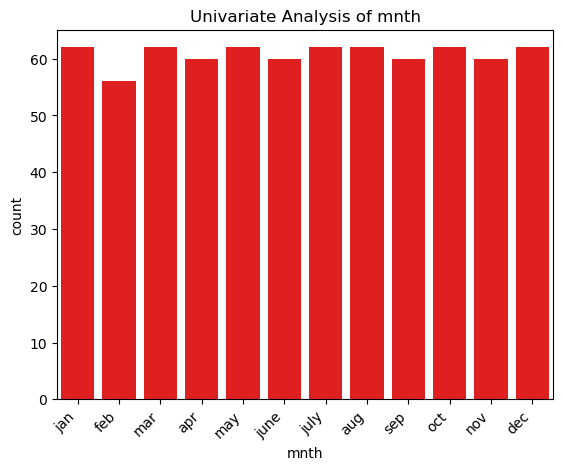

In [546]:
sns.countplot(x=bike['mnth'],color='Red')
plt.xticks(rotation=45, ha='right')
plt.title('Univariate Analysis of mnth')
plt.show()

#### Demand of bike seem to increase in the begining of the season and then decreases towards the end.

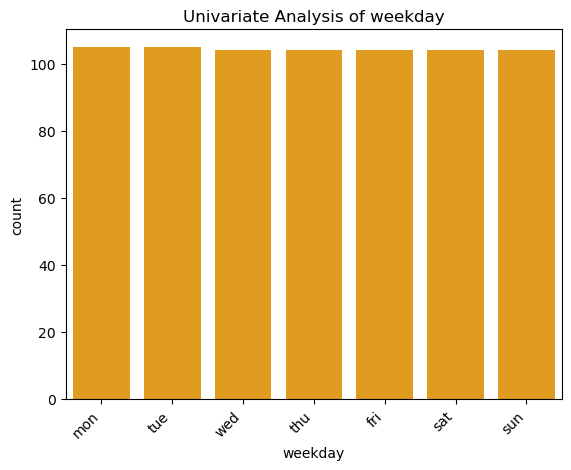

In [548]:
sns.countplot(x=bike['weekday'],color='Orange')
plt.xticks(rotation=45, ha='right')
plt.title('Univariate Analysis of weekday')
plt.show()

#### Bike rentals seem to be same on every day of the week.

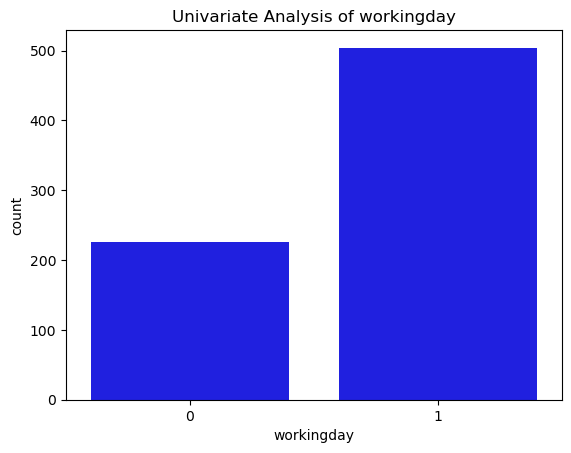

In [550]:
sns.countplot(x=bike['workingday'],color='Blue')
plt.title('Univariate Analysis of workingday')
plt.show()

#### Demand of bikes is less on workingday.

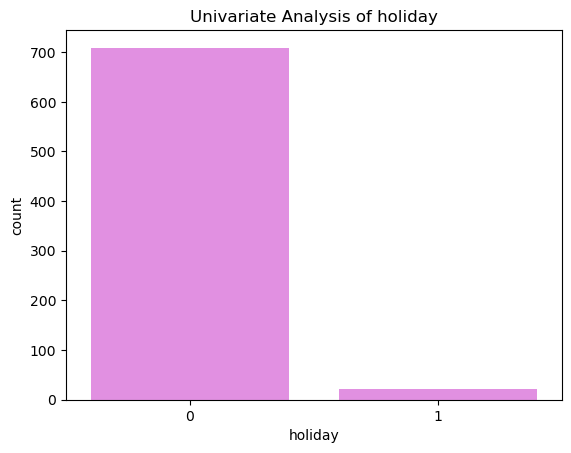

In [556]:
sns.countplot(x=bike['holiday'],color='Violet')
plt.title('Univariate Analysis of holiday')
plt.show()

#### Bike rentals seem to have more demand on a holiday.

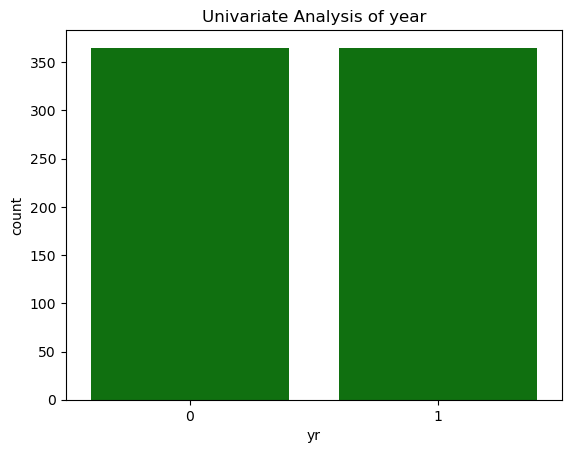

In [558]:
sns.countplot(x=bike['yr'],color='Green')
plt.title('Univariate Analysis of year')
plt.show()

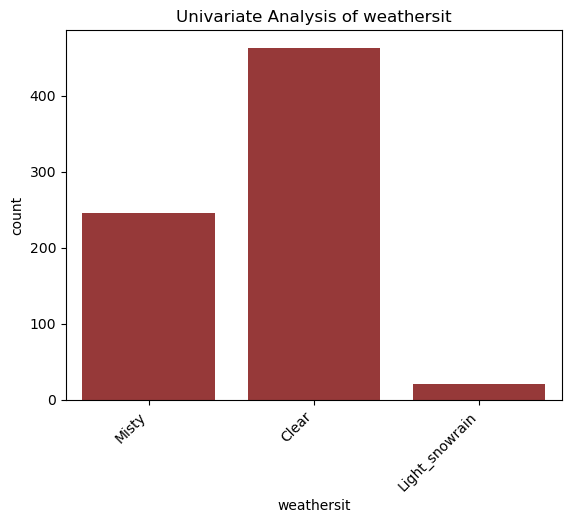

In [559]:
sns.countplot(x=bike['weathersit'],color='Brown')
plt.xticks(rotation=45, ha='right')
plt.title('Univariate Analysis of weathersit')
plt.show()

#### Demand of bikes is more when the weather is clear

### Bivariate Analysis

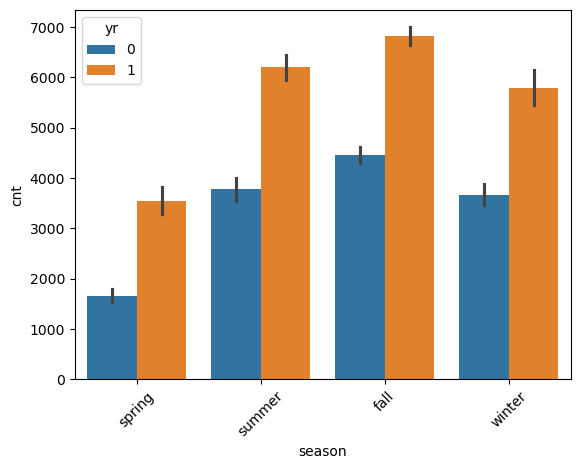

In [562]:
sns.barplot(data =bike, x='season',y='cnt', hue ='yr')
plt.xticks(rotation=45)
plt.show()

#### Demand of bike rentals seem to drastically increase from 2018 to 2019

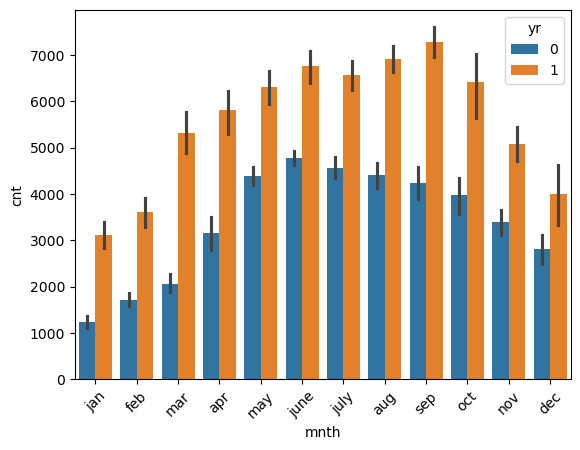

In [565]:
sns.barplot(data =bike, x='mnth',y='cnt', hue ='yr')
plt.xticks(rotation=45)
plt.show()

#### Demand of bike seem to increase in the begining of the season and then decreases towards the end

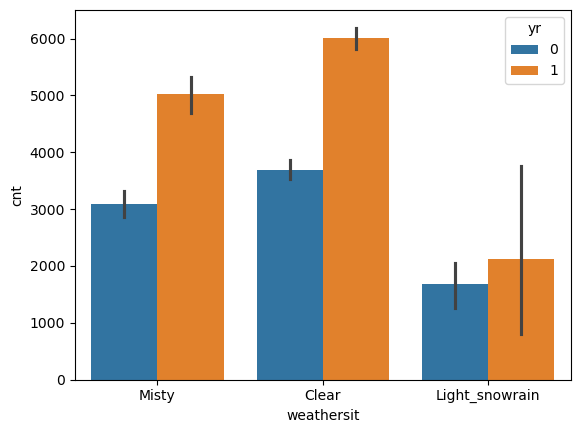

In [567]:
sns.barplot(data =bike, x='weathersit',y='cnt', hue ='yr')
plt.show()

#### Demand of bike is more on clear weather and is more than last year

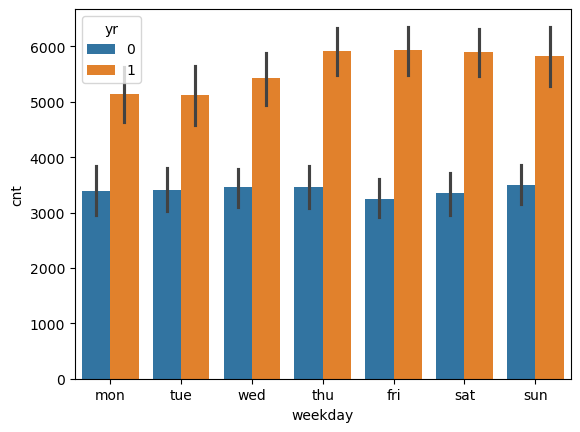

In [570]:
sns.barplot(data =bike, x='weekday',y='cnt', hue ='yr')
plt.show()

#### Bike rentals seem to be same on every day of the week since it drastically increased from 2018 to 2019

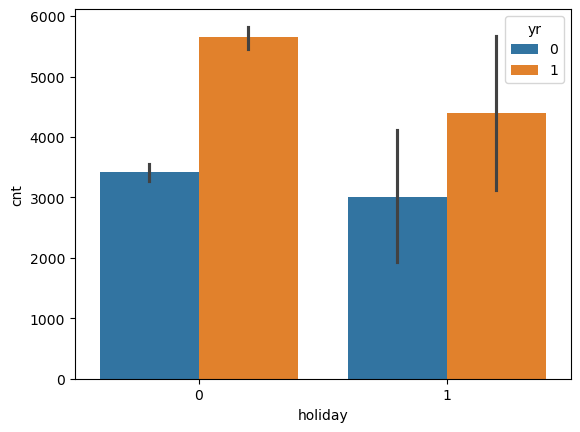

In [572]:
sns.barplot(data =bike, x='holiday',y='cnt', hue ='yr')
plt.show()

#### Demand of bikes is more on holiday 

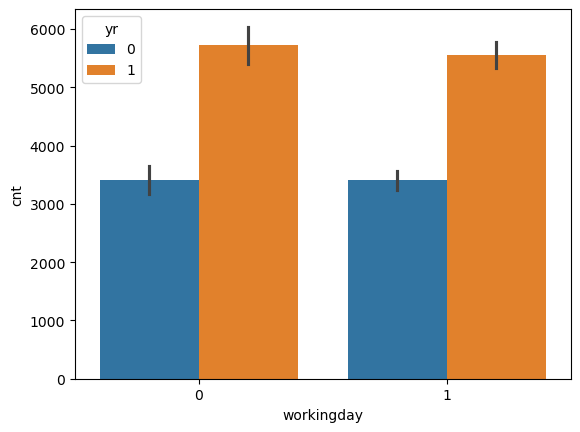

In [575]:
sns.barplot(data =bike, x='workingday',y='cnt', hue ='yr')
plt.show()

#### Demand of bikes is less on workingday

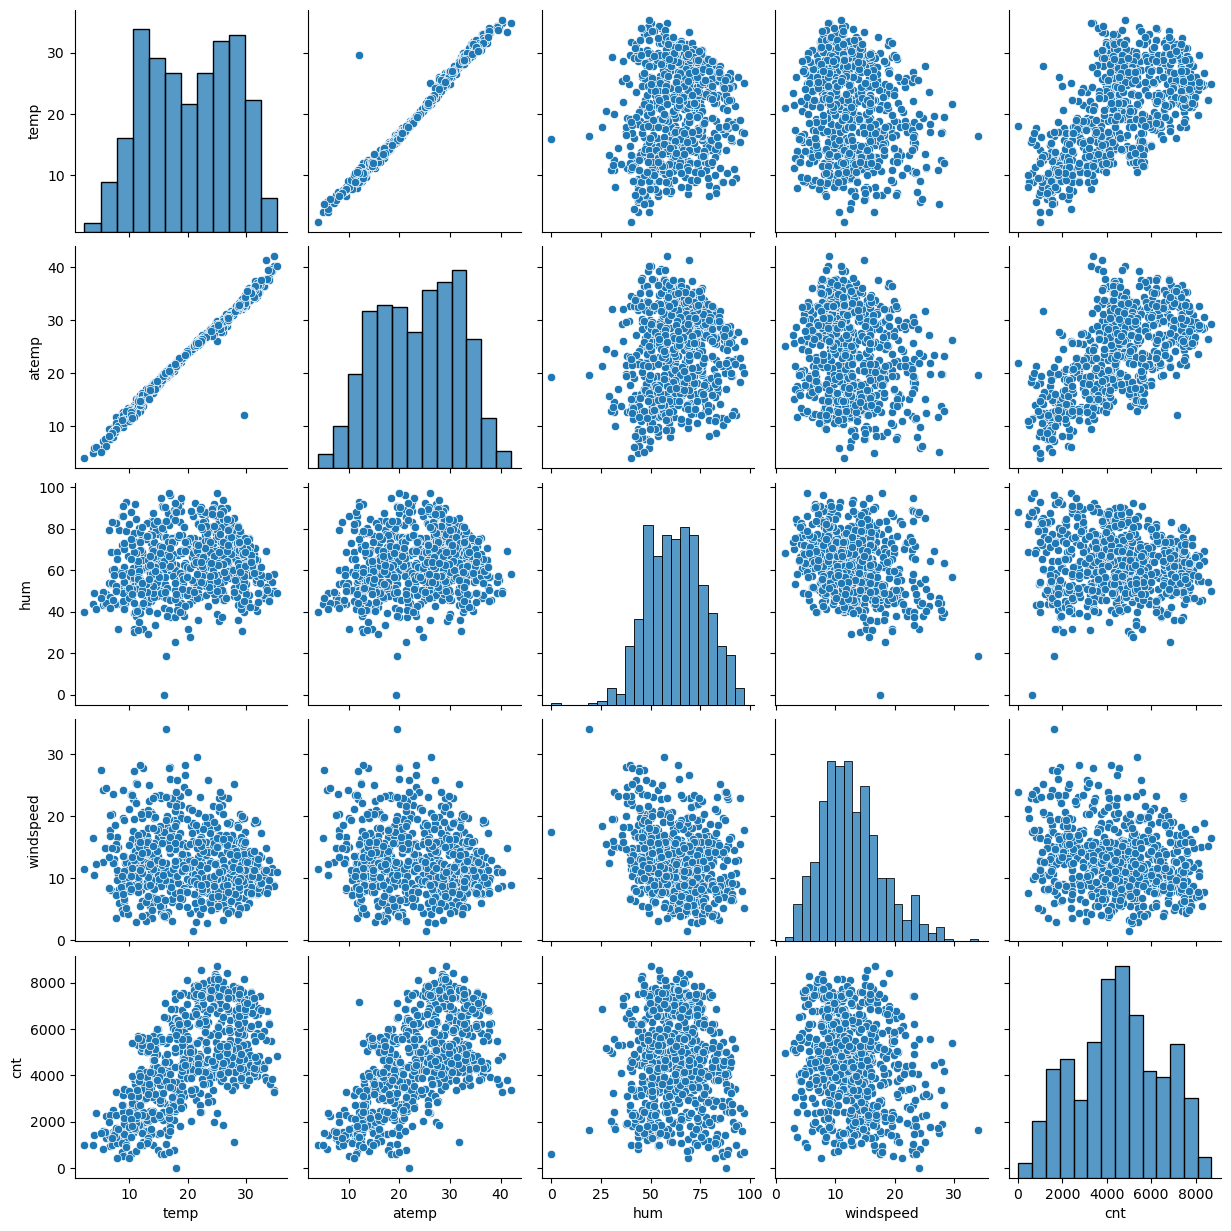

In [577]:
#Analysing the numerical columns
sns.pairplot(data=bike,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

#### temp and atemp have a linear relationship. Moreover, they have high correlation

<Axes: >

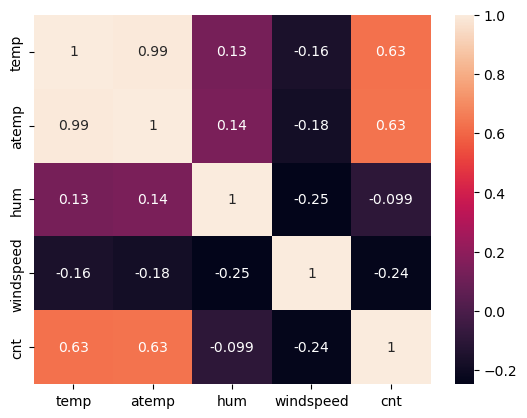

In [579]:
#Checking correlation between the numerical variables
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True)

## Data preperation

In [581]:
#Dummy variable creation for month,weekday,weathersit and season variables
mnth_df=pd.get_dummies(bike.mnth,drop_first=True)
weekday_df=pd.get_dummies(bike.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike.season,drop_first=True)

In [582]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [583]:
#Merging the dataset with dummy variables
bike_new= pd.concat([bike,mnth_df,weekday_df,weathersit_df,seasons_df], axis = 1)

In [584]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,False,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,False,False,False,True,False,False,True,True,False,False
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,True,False,False,True,False,False
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,False,False,True,False,False,False,False,True,False,False
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,False,False,False,True,False,False


In [585]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    bool   
 13  dec             730 non-null    bool   
 14  feb             730 non-null    bool   
 15  jan             730 non-null    bool   
 16  july            730 non-null    bool   
 17  june            730 non-null    boo

In [586]:
#Changing datatype 
bike_new['sat'] = bike_new['sat'].astype(int)
bike_new['sun'] = bike_new['sun'].astype(int)
bike_new['thu'] = bike_new['thu'].astype(int)
bike_new['tue'] = bike_new['tue'].astype(int)
bike_new['wed'] = bike_new['wed'].astype(int)
bike_new['mon'] = bike_new['mon'].astype(int)
bike_new['Light_snowrain'] = bike_new['Light_snowrain'].astype(int)
bike_new['Misty'] = bike_new['Misty'].astype(int)
bike_new['winter'] = bike_new['winter'].astype(int)
bike_new['summer'] = bike_new['summer'].astype(int)
bike_new['spring'] = bike_new['spring'].astype(int)
bike_new['jan'] = bike_new['jan'].astype(int)
bike_new['feb'] = bike_new['feb'].astype(int)
bike_new['mar'] = bike_new['mar'].astype(int)
bike_new['may'] = bike_new['may'].astype(int)
bike_new['june'] = bike_new['june'].astype(int)
bike_new['july'] = bike_new['july'].astype(int)
bike_new['aug'] = bike_new['aug'].astype(int)
bike_new['sep'] = bike_new['sep'].astype(int)
bike_new['oct'] = bike_new['oct'].astype(int)
bike_new['nov'] = bike_new['nov'].astype(int)
bike_new['dec'] = bike_new['dec'].astype(int)

In [587]:
#Dropping unnecessary columns since we have created the dummy variables
bike_new.drop(['mnth','weekday','season','weathersit'],axis=1,inplace=True)

In [589]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [590]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    int32  
 9   dec             730 non-null    int32  
 10  feb             730 non-null    int32  
 11  jan             730 non-null    int32  
 12  july            730 non-null    int32  
 13  june            730 non-null    int32  
 14  mar             730 non-null    int32  
 15  may             730 non-null    int32  
 16  nov             730 non-null    int32  
 17  oct             730 non-null    int

## Splitting the data into train set and test set

In [592]:
# Splitting data into training and testing sets
np.random.seed(0)
bike_train,bike_test = train_test_split(bike_new,train_size=0.7,test_size=0.3,random_state=100)

In [593]:
bike_test.shape

(219, 30)

In [594]:
bike_train.shape

(510, 30)

In [595]:
#Using MinMaxScaler for rescaling the features
scaler=MinMaxScaler()

In [596]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [597]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0


In [598]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


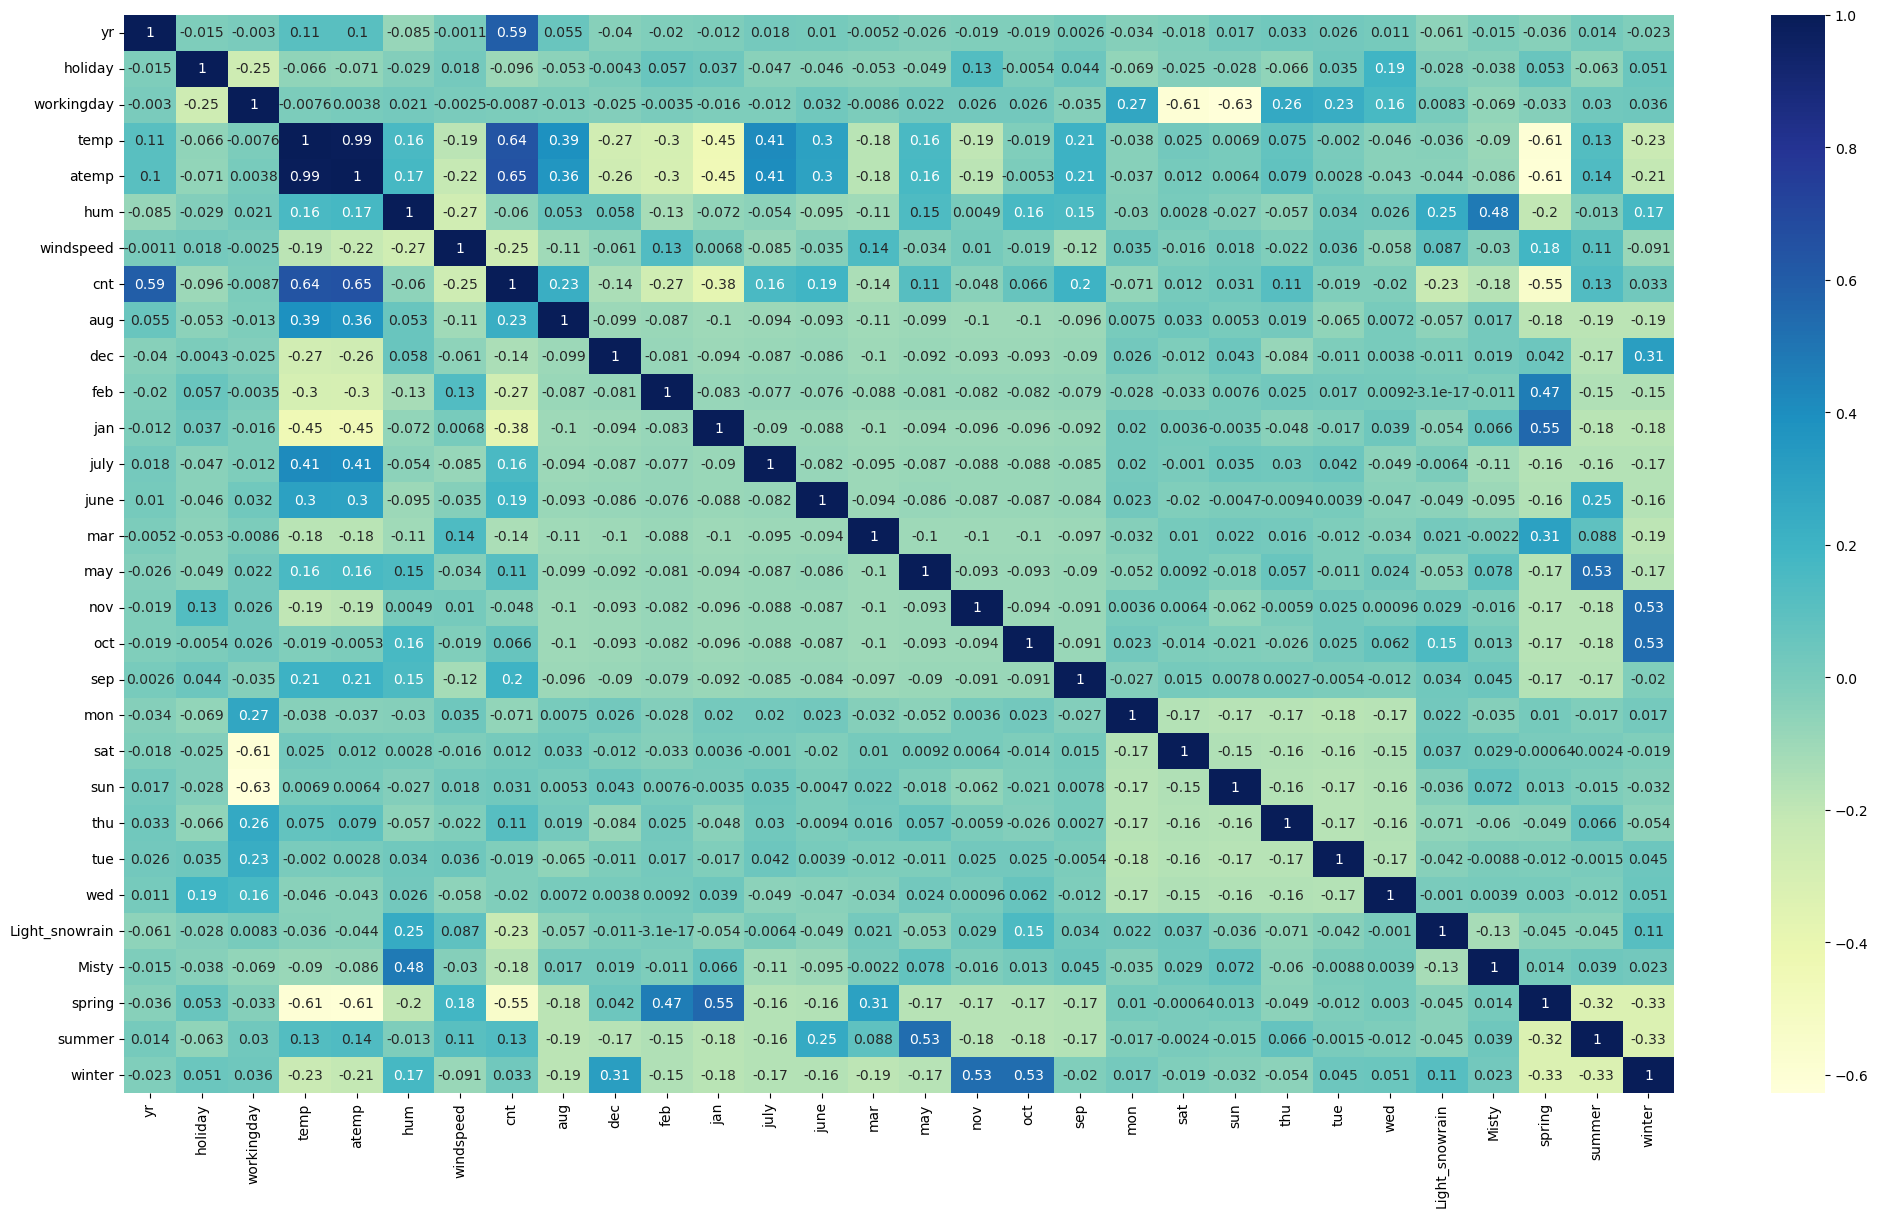

In [599]:
#Checking which variables are highly correlated
plt.figure(figsize = (25, 14))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

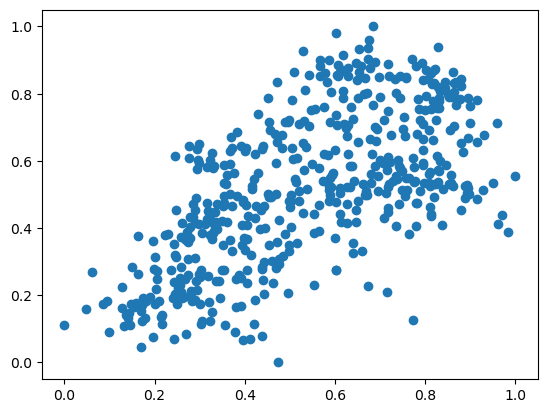

In [600]:
#Visualizing one of the correlation using scatter plot
plt.scatter(bike_train.temp,bike_train.cnt)
plt.show()

In [601]:
#Building Linear Model
y_train=bike_train.pop('cnt')
X_train=bike_train

In [603]:
#Recursive feature elimination
lm=LinearRegression()
rfe=RFE(estimator=lm,n_features_to_select=15)
rfe.fit(X_train,y_train)

print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True False  True  True False  True False  True  True
 False False False  True False  True False False False False False False
  True  True  True  True  True]
[ 1  1  3  1  6  1  1 10  1  2  1  1 14 15  7  1 12  1  9  4  5 13  8 11
  1  1  1  1  1]


In [604]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tue', False, 8),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [605]:
X_train_lm = sm.add_constant(X_train[['temp']])
lr = sm.OLS(y_train, X_train_lm).fit()

In [606]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

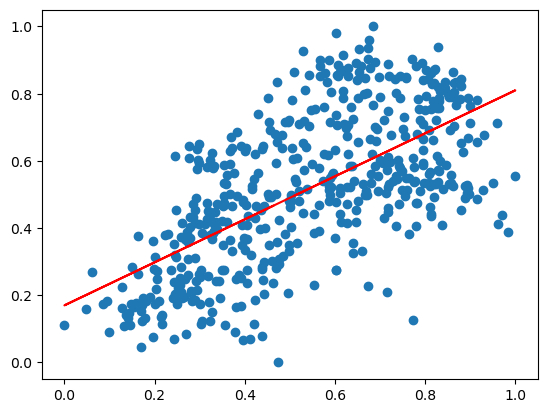

In [607]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.170 + 0.640*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [608]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           5.80e-61
Time:                        19:39:34   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

In [609]:
#Selecting the selected variable using RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'dec', 'jan', 'july',
       'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')


In [610]:
#Checking columns which have been rejected
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [611]:
#Function to calculate VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [612]:
#Dataframw with RFE selected variables
X_train_rfe = X_train[col]

In [613]:
#Calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.81
11,Misty,2.32
0,yr,2.09
8,nov,1.83
6,jan,1.75


#### We can see that humidity has high VIF. It is better to remove it first

## Building a linear model

### Model-1

In [653]:
#Adding constant
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

In [654]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          3.34e-189
Time:                        19:39:46   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3202      0.036      8.

In [655]:
#Humidity has high VIF hence we can drop it
X_train_new = X_train_rfe.drop('hum', axis=1)

In [656]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.94
11,spring,2.89
12,summer,2.23
0,yr,2.07
7,nov,1.80
5,jan,1.66
6,july,1.59
10,Misty,1.56


### Model-2

In [658]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

In [659]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.57e-186
Time:                        19:39:48   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2466      0.032      7.

In [664]:
#Dropping nov as it has high p-value
X_train_new = X_train_new.drop('nov', axis=1)

In [665]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.23
0,yr,2.07
12,winter,2.06
5,jan,1.65
6,july,1.59
9,Misty,1.56
7,sep,1.34


### Model-3

In [667]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()

In [670]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.20e-186
Time:                        19:39:53   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2288      0.031      7.

In [671]:
#Dropping jan as it has high p-value
X_train_new = X_train_new.drop('jan', axis=1)

In [672]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
10,summer,2.22
9,spring,2.13
0,yr,2.07
11,winter,2.04
5,july,1.58
8,Misty,1.55
6,sep,1.34
4,dec,1.26


### Model-4

In [674]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train, X_train_lm_4).fit()

In [675]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.6
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          1.64e-186
Time:                        19:39:54   Log-Likelihood:                 500.02
No. Observations:                 510   AIC:                            -974.0
Df Residuals:                     497   BIC:                            -919.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2069      0.030      6.

In [676]:
#Dropping july as it has high p-value
X_train_new = X_train_new.drop('july', axis=1)

In [677]:
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
8,spring,2.05
9,summer,1.89
10,winter,1.88
7,Misty,1.54
4,dec,1.25
5,sep,1.23
6,Light_snowrain,1.08


### Model-5

In [680]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train, X_train_lm_5).fit()

In [681]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.0
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          5.22e-186
Time:                        19:39:55   Log-Likelihood:                 496.01
No. Observations:                 510   AIC:                            -968.0
Df Residuals:                     498   BIC:                            -917.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1984      0.030      6.

In [682]:
#Dropping dec as it has high p-value
X_train_new = X_train_new.drop('dec', axis=1)

In [685]:
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
7,spring,1.99
8,summer,1.89
9,winter,1.63
6,Misty,1.54
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


#### The VIF value of all the variables is below 5.

### Model-6

In [688]:
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train, X_train_lm_6).fit()

In [689]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 03 Mar 2025   Prob (F-statistic):          7.36e-187
Time:                        19:39:56   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1910      0.030      6.

#### We can consider this model as the p-value fro all the predictors is significant and VIF of all the variables is below 5. It seems to have low multicolineaarity between the predictors.

In [695]:
lr_6.params

const             0.190994
yr                0.234060
holiday          -0.096865
temp              0.478177
windspeed        -0.148155
sep               0.090932
Light_snowrain   -0.286002
Misty            -0.080124
spring           -0.055092
summer            0.060987
winter            0.095929
dtype: float64

## Residual Analysis

In [707]:
X_train_lm_6

,const,yr,holiday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
653,1.0,1,0,0.509887,0.300794,0,0,0,0,0,1
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,1,0,1,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1


In [709]:
y_train_price = lr_6.predict(X_train_lm_6)

### Normality of error terms

Text(0.5, 0, 'Errors')

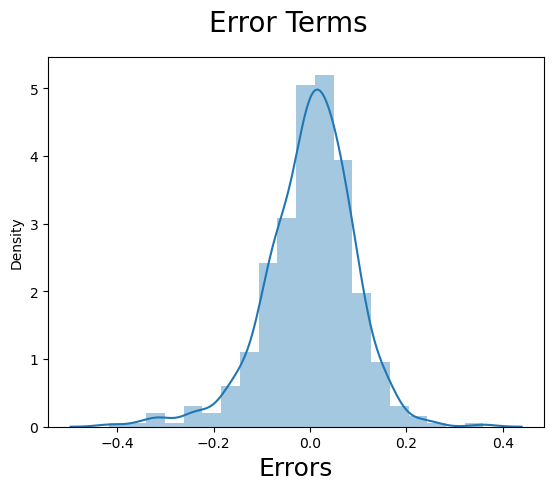

In [711]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

## Making Predictions using Model-6

In [714]:
#Aplying scaling on test datset
num_vars=['temp','atemp','hum','windspeed','cnt']
bike_test[num_vars]=scaler.transform(bike_test[num_vars])

In [715]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [716]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [719]:
y_test=bike_test.pop('cnt')
X_test=bike_test

In [720]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [721]:
y_pred = regressor.predict(X_test)

In [723]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: cnt, Length: 219, dtype: float64

In [724]:
#Calculating R-squared
r2=r2_score(y_pred,y_test)
r2

0.8061923885357162

In [725]:
#Rounding R-squared 
round(r2,3)

0.806

In [734]:
#Calculating adjusted R-squared
1-((1-r2)*((len(X_train)-1)/(len(X_train)-len(X_train.columns)+1))) 

0.7953359455698745

## Model Evaluation

Text(0, 0.5, 'y_pred')

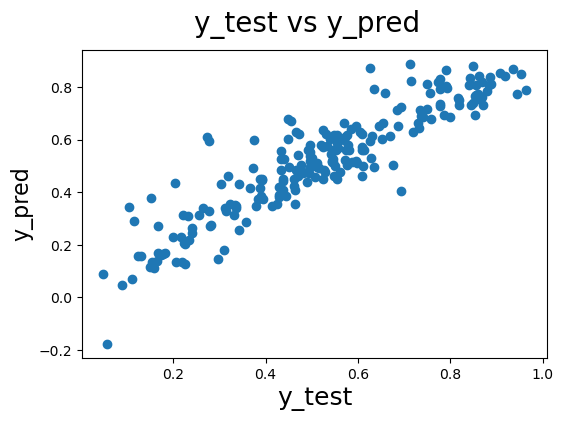

In [737]:
#Plotting y_test and y_pred to undertsand the spred
fig = plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16)  

In [738]:
round(lr_6.params,3)

const             0.191
yr                0.234
holiday          -0.097
temp              0.478
windspeed        -0.148
sep               0.091
Light_snowrain   -0.286
Misty            -0.080
spring           -0.055
summer            0.061
winter            0.096
dtype: float64

#### We can see that the equation of our best fitted line is:
#### cnt = 0.191 + 0.234 * yr + -0.097 * holiday + 0.478 * temp + -0.148 * windspeed + 0.091 * sep + -0.286 * Light_snowrain + -0.080 * Misty + -0.055 * spring + 0.061 * summer + 0.096 * winter

In [740]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),3)
print(adjusted_r2)

0.776


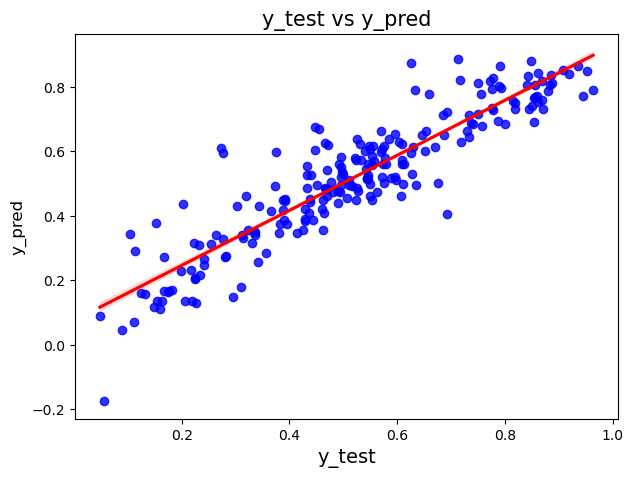

In [741]:
# Visualizing the fit on the test data
plt.figure(figsize=(7,5))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=15)
plt.xlabel('y_test', fontsize=14)
plt.ylabel('y_pred', fontsize=12)
plt.show()

## Comaprision between Training and Testing dataset

"""
- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.806
- Train dataset Adjusted R^2 : 0.830    
- Test dataset Adjusted R^2  : 0.776

"""

#### The demand of bikes depend upon year,holiday,temperature,windspeed,september,Light_snowrain,Misty,spring,summer and winter.